In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/HPPC/Desktop/python projects/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CHECKING TO SEE IF THERE IS ANY NULL VALUES

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

GLANCE AT THE STATISTICAL OVERVIEW OF THE DATA

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


QUESTION: WHAT IS THE DISTRIBUTION OF CUSTOMERS SPENDING SCORE BY AGE?

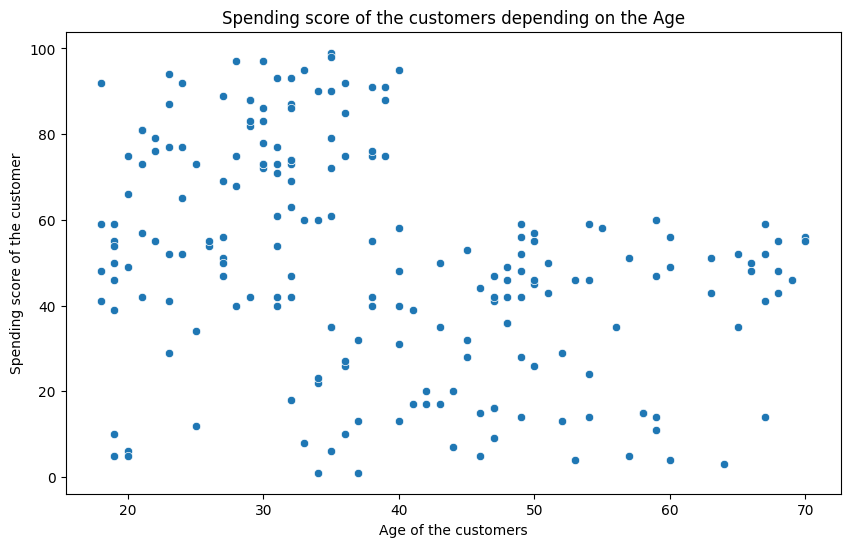

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = data)
plt.xlabel('Age of the customers')
plt.ylabel('Spending score of the customer')
plt.title('Spending score of the customers depending on the Age')
plt.show()

?WHAT IS THE DISTRIBUTION OF CUSTOMERS BASED ON ANUAL INCOME?

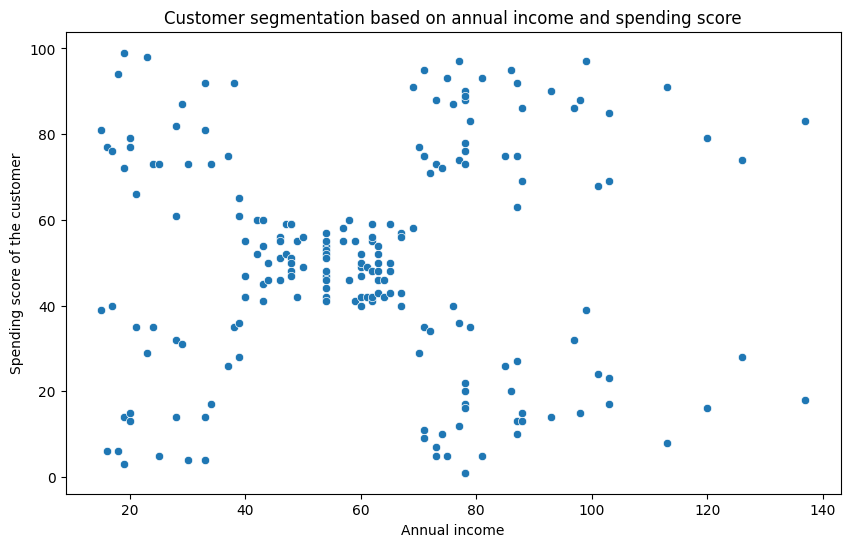

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data)
plt.xlabel('Annual income')
plt.ylabel('Spending score of the customer')
plt.title('Customer segmentation based on annual income and spending score')
plt.show()

WHAT IS THE STATISTICAL OVERVIEW OF THE SPENDING SCORE BASED ON THE GENDER

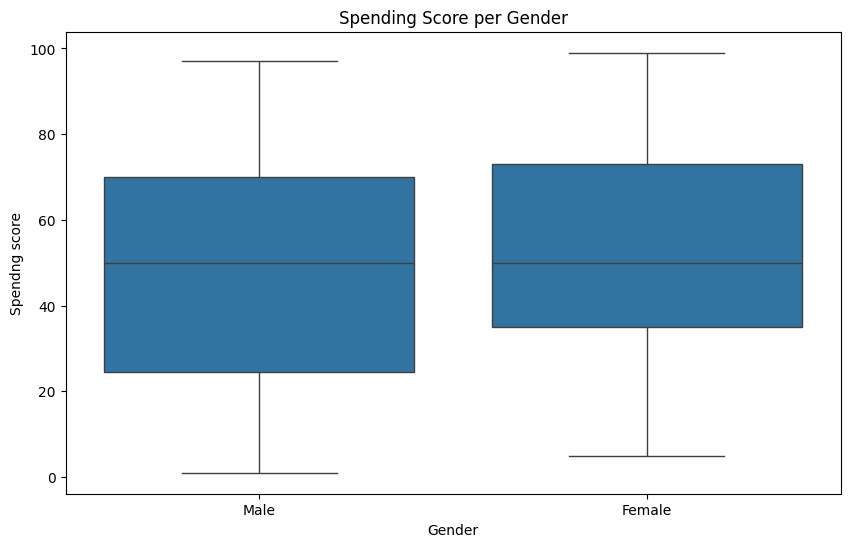

In [8]:
plt.figure(figsize= (10,6))
sns.boxplot(x = 'Gender', y = "Spending Score (1-100)", data = data)
plt.xlabel("Gender")
plt.ylabel('Spendng score')
plt.title("Spending Score per Gender")
plt.show()

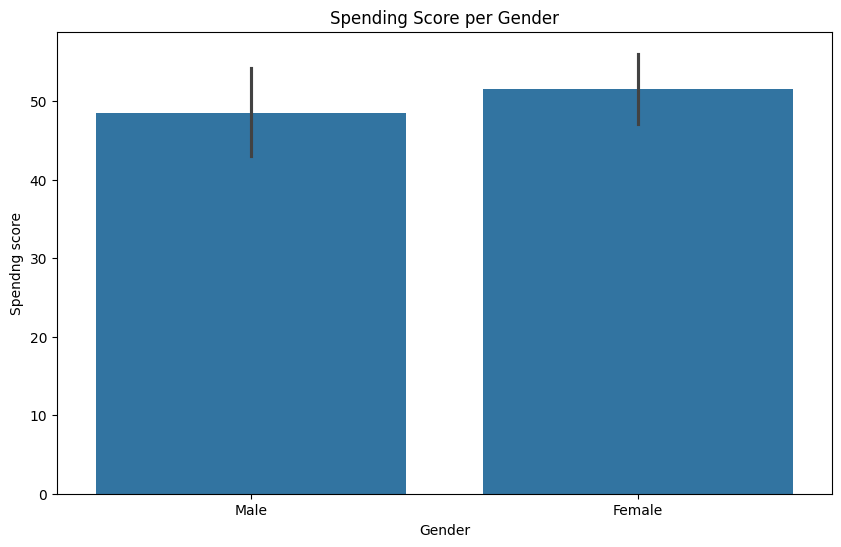

In [9]:
plt.figure(figsize= (10,6))
sns.barplot(x = 'Gender', y = "Spending Score (1-100)", data = data)
plt.xlabel("Gender")
plt.ylabel('Spendng score')
plt.title("Spending Score per Gender")
plt.show()

SPENDING SCORE BASED ON AGE


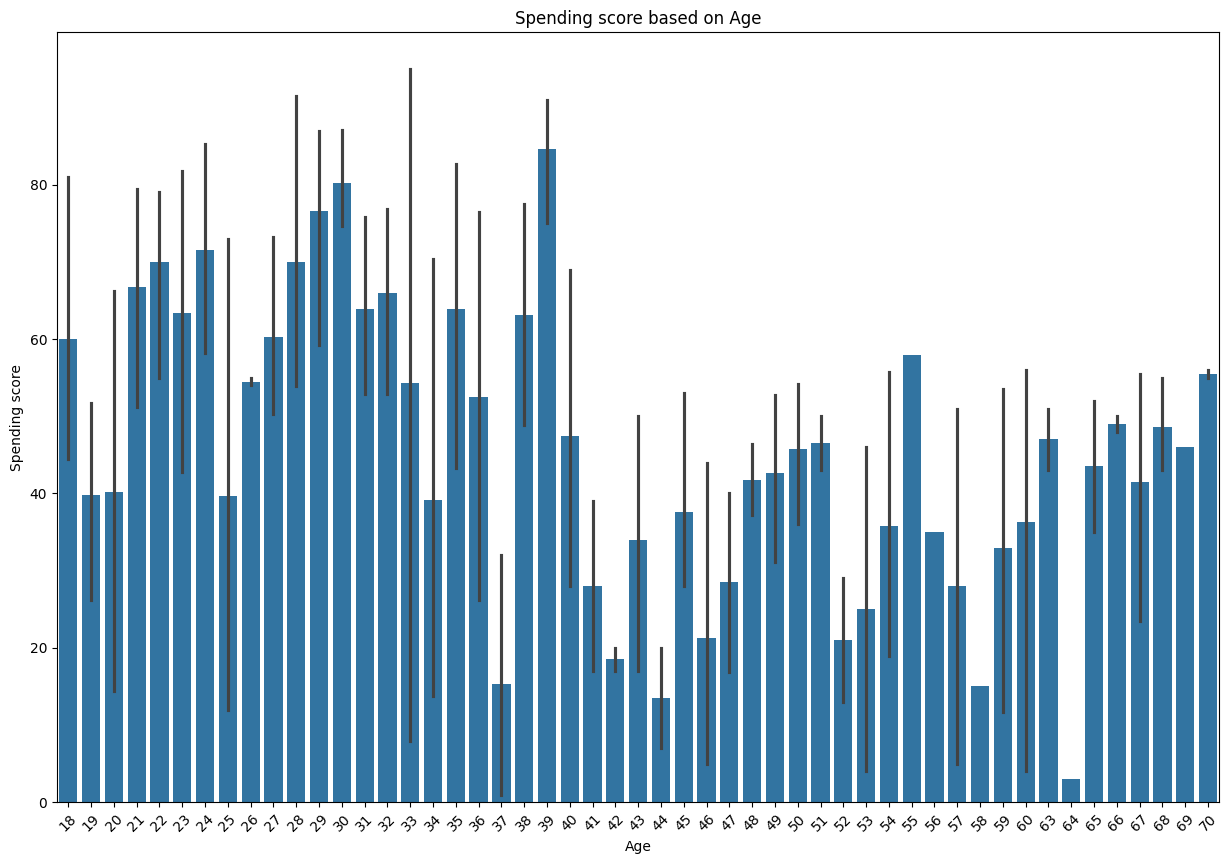

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x='Age', y = 'Spending Score (1-100)', data = data)
plt.xlabel('Age')
plt.ylabel("Spending score")
plt.title("Spending score based on Age")
plt.xticks(rotation = 45)
plt.show()

ANNUAL INCOME ACCORDING TO THE AGE


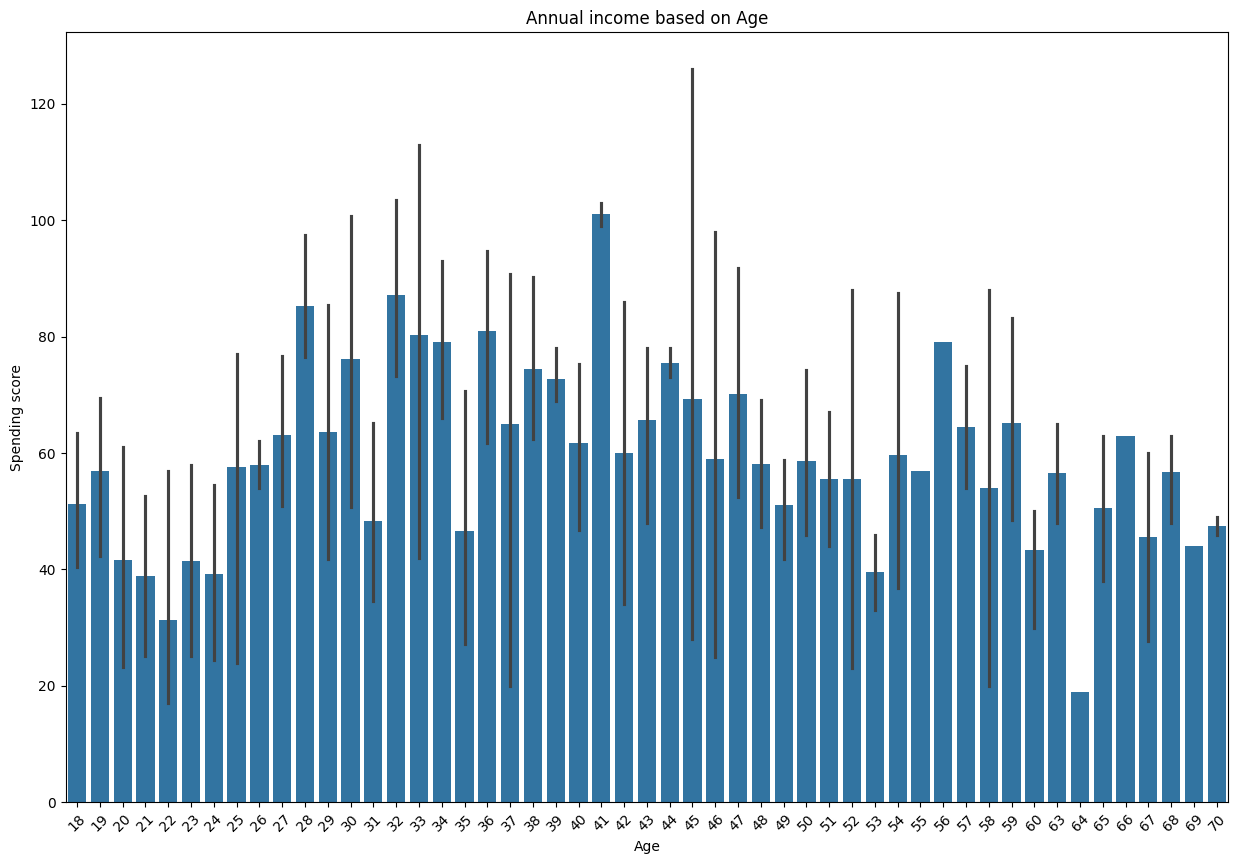

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='Age', y = 'Annual Income (k$)', data = data)
plt.xlabel('Age')
plt.ylabel("Spending score")
plt.title("Annual income based on Age")
plt.xticks(rotation = 45)
plt.show()

USING THE STANDARD SCALER TO PROCESS THE DATA
Essentially normalising the columns I need to create the model

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_feature = scaler.fit_transform(data[['Annual Income (k$)','Spending Score (1-100)']])
scaled_features = pd.DataFrame(scaled_feature)
scaled_features.head()



,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


SETTING UP THE MODEL AND INTRODUCING A NEW COLUMN TO THE DATA SET 'data' SO THAT I CAN PLOT WITH IT
THE NUMBER OF CLUSTERS IVE CHOSEN IS 5 BASED ON THE ELBOW METHOD DUE TO ITS MODERATE INERTIA

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, random_state=  42)
kmeans.fit(scaled_features)
#Adding cluster labels to the original dataset
data['clusters'] = kmeans.labels_
#Adding a new column to the data

THIS IS HOW TO FIND THE MOST SUITABLE NUMBER OF CLUSTERS

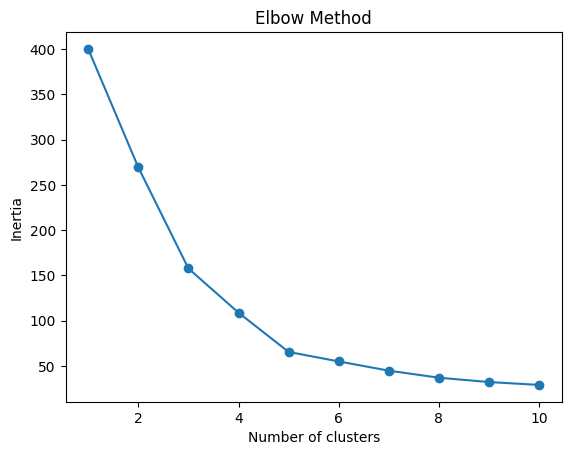

In [31]:
from sklearn.cluster import KMeans
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10,random_state=0 )
    kmeans.fit(scaled_features)

    #init = 'k-means' initalizes the number of clusters at the very begining of clustering
    #n_init = 10 number of times the kmeans algorithm will be run with different seeds

    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker = 'o')
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

PLOTTING THE ACTUAL CLUSTERS

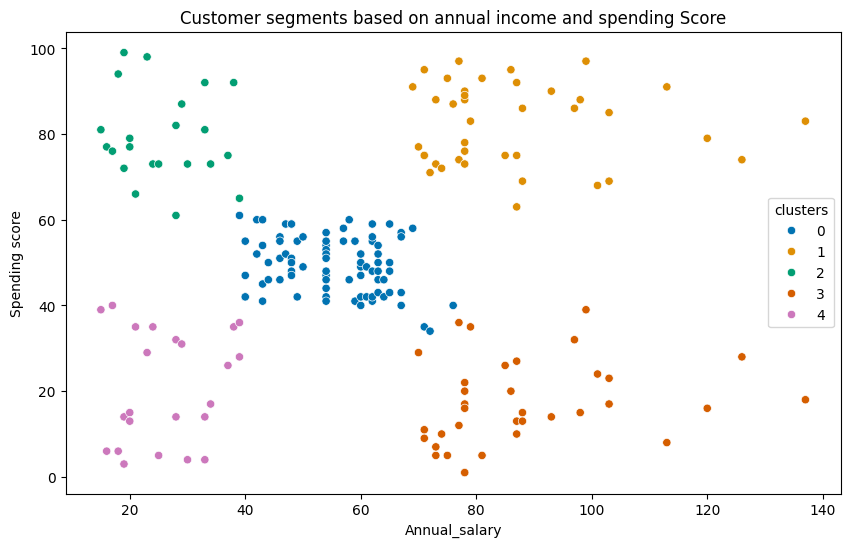

In [32]:
plt.figure(figsize= (10,6))
sns.scatterplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data = data , hue= 'clusters', palette='colorblind')
#Hue allows you to colour a scatter point based on a categorical variable
plt.xlabel('Annual_salary')
plt.ylabel('Spending score')
plt.title("Customer segments based on annual income and spending Score")
plt.show()